In [1]:
import pandas as pd


In [2]:
print("hello")

hello


In [6]:
out = pd.read_csv('result.csv')  
out = out.drop(["iterations", "time_unit", "bytes_per_second", "items_per_second", "label","error_occurred", "error_message", "cpu_time"], axis =1 )
spill_res = out["name"].str.split(":")
names = ["type", "size"]
data = spill_res.to_list()
new_df = pd.DataFrame(data, columns=names)
res = pd.concat([new_df, out], axis=1)
res = res.drop("name", axis = 1)
res["size"]  = pd.to_numeric(res["size"])

In [7]:
res.dtypes

type          object
size           int64
real_time    float64
dtype: object

In [8]:
res

,type,size,real_time
0,HandMadeCPUMatrix,32,90982.5
1,HandMadeOpenCLMatrix,32,1165110.0
2,Eigen,32,566316.0
3,HandMadeCPUMatrix,64,321087.0
4,HandMadeOpenCLMatrix,64,1246300.0
...,...,...,...
145,HandMadeOpenCLMatrix,1568,35026800.0
146,Eigen,1568,39053800.0
147,HandMadeCPUMatrix,1600,208849000.0
148,HandMadeOpenCLMatrix,1600,38610100.0


In [9]:


handmadeCPU=res["type"] == "HandMadeCPUMatrix"
handmadeOpenCL  = res["type"] == "HandMadeOpenCLMatrix"
eigen = res["type"] == "Eigen"

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

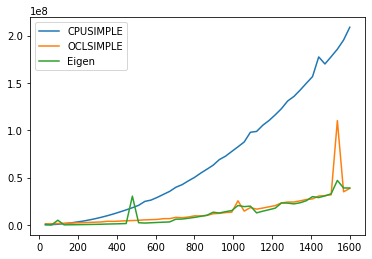

In [11]:
plt.plot(res[handmadeCPU]["size"], res[handmadeCPU]["real_time"],label='CPUSIMPLE')
plt.plot(res[handmadeOpenCL]["size"], res[handmadeOpenCL]["real_time"],label='OCLSIMPLE')
plt.plot(res[eigen]["size"], res[eigen]["real_time"],label='Eigen')
plt.legend()
plt.show()

In [60]:
mask = res["real_time"] < 1e8
res = res[mask]